# Банки — Сегментация пользователей по потреблению

## Задача**:**

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*

## Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Загрузка и обработка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# загрузим данные
df = pd.read_csv('/datasets/bank_dataset.csv')
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [4]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
# проверим столбец с городом
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,1.573368e+07,71936.186123,15608437.00,1.567126e+07,1.573347e+07,1.579597e+07,15858426.00
score,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,92.00
objects,10000.0,5.012800e+00,2.892174,0.00,3.000000e+00,5.000000e+00,7.000000e+00,10.00
balance,6383.0,1.198275e+05,30095.056462,3768.69,1.001820e+05,1.198397e+05,1.395123e+05,250898.09
products,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.00
creditcard,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
loyalty,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,5.100211e+04,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.00


In [7]:
# проверим пропуски
df_null = df[df['balance'].isnull()]
df_null.head(10)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724.03,0


In [8]:
# проверим в каких городах есть пропуски
df_null['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

In [9]:
### КОД РЕВЬЮЕРА
pd.get_dummies(df.assign(gender=(df.gender == "М")*1)).drop("userid",axis=1)\
    .groupby(df.balance.isna()).agg('mean').T\
    .style.format("{:.1f}")

balance,False,True
score,651.1,649.5
gender,0.5,0.5
age,39.2,38.4
objects,5.0,5.1
balance,119827.5,nan
products,1.4,1.8
creditcard,0.7,0.7
loyalty,0.5,0.5
estimated_salary,100717.4,98983.6
churn,0.2,0.1


In [11]:
# проверим дубликаты
df.duplicated().sum()

0

In [12]:
# проверим уникальность клиентов
len(df['userid'].unique())

10000

In [13]:
# удалим столбец с индификатором пользователя
df = df.drop(['userid'], axis=1)

In [14]:
df['city_index'] = df['city']
df['gender_index'] = df['gender']
df = pd.get_dummies(df, columns=["city_index", "gender_index"], prefix=["city", "gender"])
df

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


### Вывод

Мы загрузили и предварительно ознакомились с данными о клиентах банка. Отрицательных значений нет, все клиенты совершеннолетние. Город проживания клиентов соответствует заданию. 

Столбцы были приведены к нижнему регистру. Дубликаты в данных отсутствуют. В столбце с балансом счета есть пропущенные значения. Причина может быть как технической неполадкой, так и пропуски могут быть связаны с нулевым балансом счета. Отдельно стоит отметить что у клиентов их Ростова Великого нет пропущенных значений в отличии от Ярославля и Рыбинска.

Был удален столбец с индификаторами пользователей для коректного отображения графиков. Можно перейти к анализу.

## Исследовательский анализ данных

In [15]:
# посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
df.groupby('churn').mean().reset_index()

,churn,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.527942,0.427477,0.572523
1,1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.397644,0.559156,0.440844


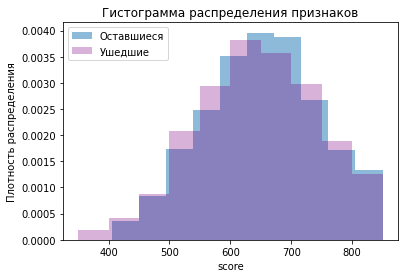

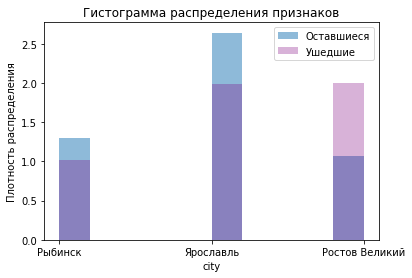

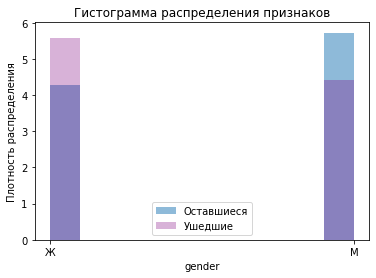

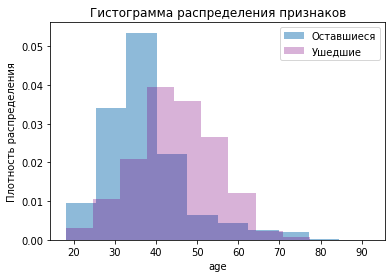

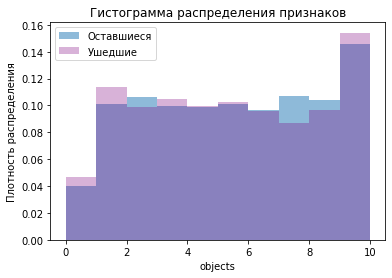

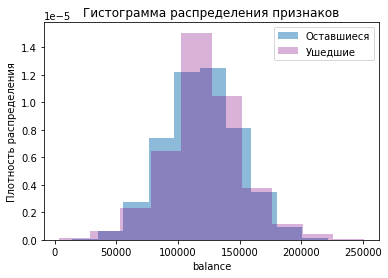

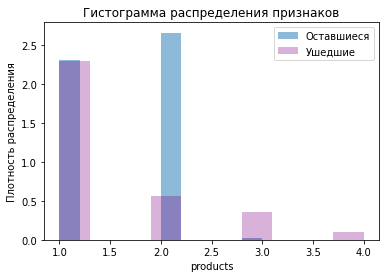

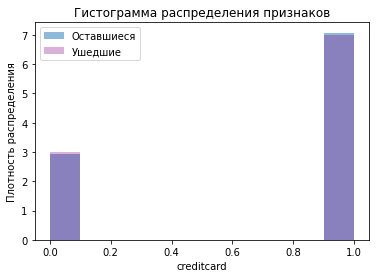

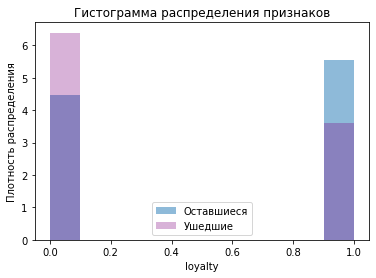

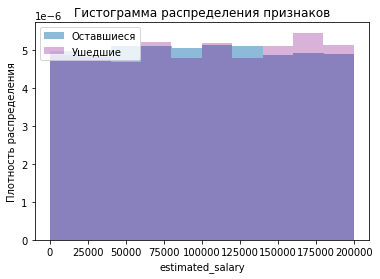

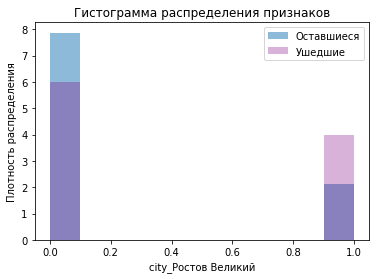

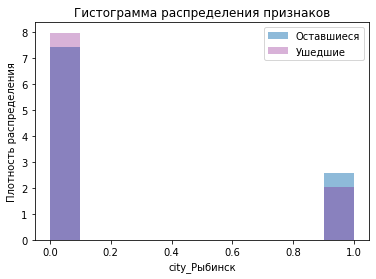

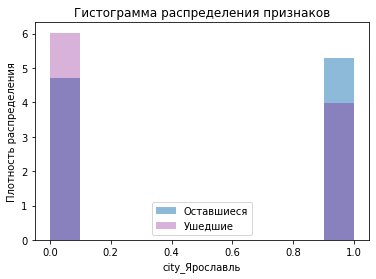

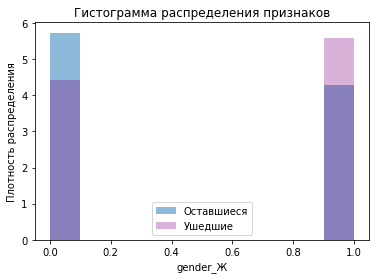

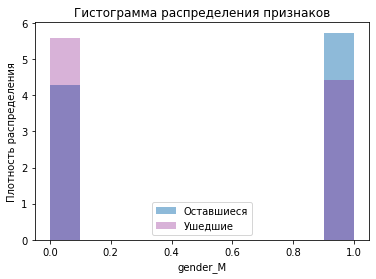

In [16]:
# построим столбчатые гистограммы и распределения признаков
# для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
for i in df.drop('churn', axis=1).columns:
    df.query('churn == 0')[i].hist(label='Оставшиеся', grid=False, density=True, alpha=0.5)
    df.query('churn == 1')[i].hist(label='Ушедшие', grid=False, density=True, alpha=0.3, color='purple')
    plt.title('Гистограмма распределения признаков')
    plt.xlabel(i)
    plt.ylabel('Плотность распределения')
    plt.legend()
    plt.show()

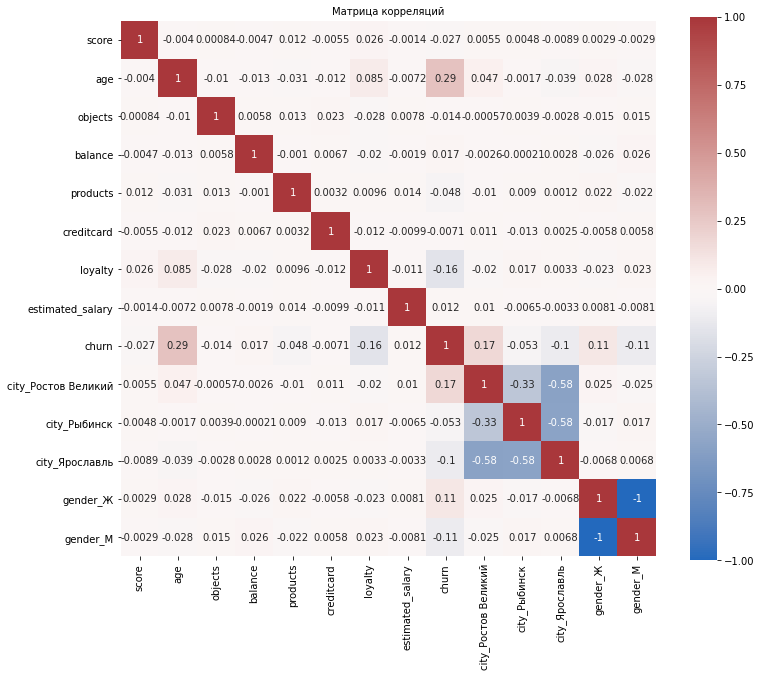

In [17]:
# построим матрицу корреляций и отобразим её
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_corr, annot=True, square=True, cmap='vlag', fmt='.2g', vmin=-1, vmax=1, center= 0)
plt.title('Матрица корреляций', fontsize = 10)
plt.show()

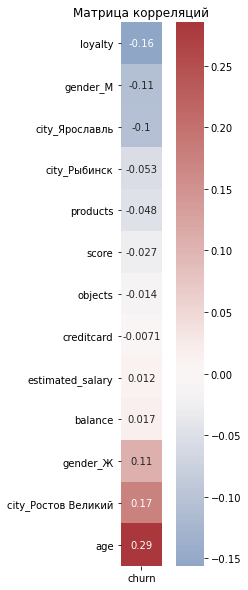

In [18]:
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(df_corr.loc[:,['churn']].drop('churn').sort_values('churn'
                                                              ), annot=True, square=True, cmap='vlag', fmt='.2g', center= 0)
plt.title('Матрица корреляций')
plt.show()

In [19]:
df.groupby('churn').median().reset_index()

,churn,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,0,653,36,5,119791.215,2,1,1,99645.04,0,0,1,0,1
1,1,646,45,5,119948.090,1,1,0,102460.84,0,0,0,1,0


### Вывод
 
Самая большая зависимость оттока от возраста клиента и в меньшей степени от активности, пола и места жительства. Эти показатели стратегически связаны с оттоком

Портрет отточного клиента:

* Средний возраст отточного клиента 45 лет. Клиенты от в возрасте от 40 до 65 лет наиболее склонны уходить в отток. 
* В среднем у таких клиентов 1 продукт.
* В Ростове Великом наибольший процент оттока
* Женщины чаще уходят, чем мужчины
* Отточные клиенты менее активны
* Реже пользуются кредитными картами, чем неотточные

Портрет неотточного клиента:

* Средний возраст отточного клиента 36 лет. Клиенты в возрасте от 20 до 40 лет не склонны уходить в отток.
* В среднем у таких клиентов 2 продукта
* В Ярославле и Рыбинске наибольший процент неотточных клиентов
* Мужчины уходят реже
* Активные клиенты не склонны к оттоку

У отточных клиентов средняя заработная плата и баланс счета выше, чем у неооточных, а балы кредитного скоринга чуть ниже.

## Сегментация пользователей на основе данных о количестве потребляемых продуктов

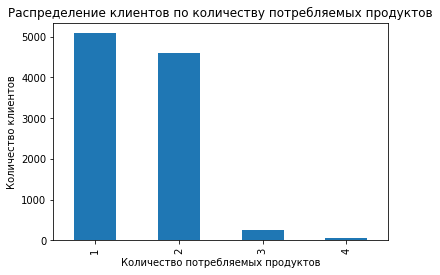

In [20]:
# построим гистограмму распределения клиентов по количеству потребляемых продуктов
df['products'].value_counts().plot(
    kind='bar')
plt.title('Распределение клиентов по количеству потребляемых продуктов')
plt.xlabel('Количество потребляемых продуктов')
plt.ylabel('Количество клиентов')
plt.show()

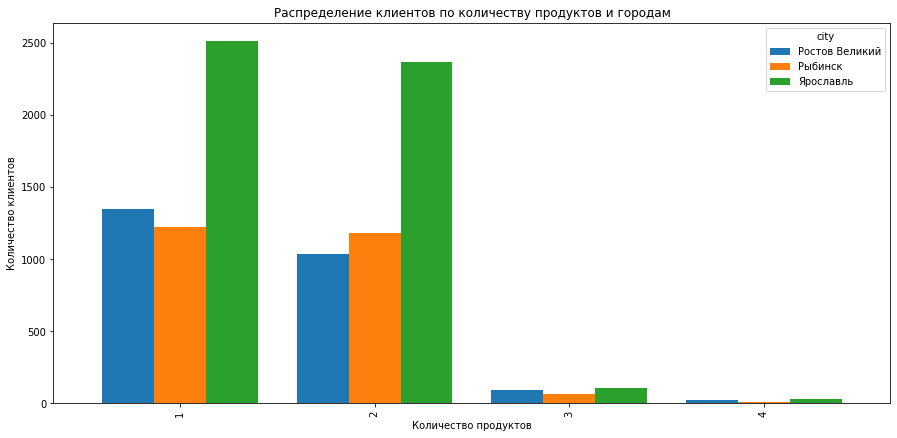

In [21]:
# проверим как распределяются клиенты по городам
df.pivot_table(
    index='products', columns = 'city', values='churn', aggfunc='count'
).plot(kind='bar', figsize=(15, 7), width=0.8)
plt.title('Распределение клиентов по количеству продуктов и городам')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.show()

In [22]:
# сгруппируем клиентов по количеству потребляемых продуктов и посмотрим на средние значения признаков
df.groupby('products').mean()

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
products,,,,,,,,,,,,,
1,649.120968,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144,0.265342,0.240165,0.494493,0.451613,0.548387
2,652.188671,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817,0.226580,0.257734,0.515686,0.448802,0.551198
3,648.105263,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068,0.360902,0.248120,0.390977,0.560150,0.439850
4,653.583333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000,0.400000,0.116667,0.483333,0.633333,0.366667


In [23]:
def seg_churn (query):
    return df.query(query).agg({
        'loyalty':"mean",'churn':"mean",'age':'mean','gender_Ж':'mean','gender_М':'mean','city_Ростов Великий':'mean','city_Рыбинск':'mean','city_Ярославль':'mean'})\
             .set_axis(['loyalty','churn','age', 'women','men', 'Ростов Великий','Рыбинск', 'Ярославль']).to_frame().T.set_axis([query])\
             .style.format(
        {"loyalty":"{:.1%}","churn":"{:.1%}","age":"{:_.0f}","women":"{:.1%}","men":"{:.1%}", "Ростов Великий":"{:.1%}","Рыбинск":"{:.1%}","Ярославль":"{:.1%}"})
display(seg_churn("products == 1"))
display(seg_churn("products == 2"))
display(seg_churn("products > 2"))

,loyalty,churn,age,women,men,Ростов Великий,Рыбинск,Ярославль
products == 1,50.4%,27.7%,40,45.2%,54.8%,26.5%,24.0%,49.4%


,loyalty,churn,age,women,men,Ростов Великий,Рыбинск,Ярославль
products == 2,53.3%,7.6%,38,44.9%,55.1%,22.7%,25.8%,51.6%


,loyalty,churn,age,women,men,Ростов Великий,Рыбинск,Ярославль
products > 2,43.6%,85.9%,44,57.4%,42.6%,36.8%,22.4%,40.8%


### Вывод

Самый оттоный сегмент это клиенты, имеющие более 2 продуктов. Это преимущественно женщины. Средний возраст 44 года. Активность ниже среднего.

In [24]:
### КОД РЕВЬЮЕРА
def seg_churn (query):
    return df.query(query).agg({'score':"count",'churn':"mean",'balance':'mean','estimated_salary':'mean'})\
             .set_axis(['num','churn','balance','salary']).to_frame().T.set_axis([query])\
             .style.format({"num":"{:.0f}","churn":"{:.1%}","balance":"{:_.0f}","salary":"{:_.0f}"})
seg_churn("products > 2")

,num,churn,balance,salary
products > 2,326,85.9%,120_074,104_400


In [25]:
### КОММЕТ РЕВЬЮЕРА: Это надо поменять: сформулируй свои запросы, основываясь на свой работе выше и посмотри на результаты

seg_churn("products < 3")

,num,churn,balance,salary
products < 3,9674,18.2%,119_819,99_945


## Проверка гипотез

Для проверки наших гипотез о равенстве мы выбрали t-тест. Мы применили этот метод, т.к. наши генеральные совокупности не зависят друг от друга. Для проверки этим критерием выборочные средние должны быть нормально распределены. Этого нельзя скзать о наших значениях, но это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Наши выборки достаточно большие. Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Мы этого не знаем. Укажем параметр equal_var = False

### Гипотеза 1

**Нулевая гипотеза:** 
средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним равен

**Альтернативная гипотеза:** 
средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним различается

In [26]:
# проверим гипотезу о равенстве среднего
products_1 = df[df['products']==1]['estimated_salary']
products_2 = df[df['products']==2]['estimated_salary']

alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(
    products_1, 
    products_2,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

**Нулевая гипотеза:** 
средний доход между теми клиентами, которые пользуются 3-4 продуктами банка, и теми, которые пользуются одним равен

**Альтернативная гипотеза:** 
средний доход между теми клиентами, которые пользуются 3-4 продуктами банка, и теми, которые пользуются одним различается

In [27]:
# проверим гипотезу о равенстве среднего
products_1 = df[df['products']==1]['estimated_salary']
products_2 = df[df['products']>2]['estimated_salary']

alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(
    products_1, 
    products_2,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1245474203443419
Не получилось отвергнуть нулевую гипотезу


### Вывод
При заданом критическом уровне статистической значимости, различия между средними зарплатами в групппах 1-2 и 1-3 отсутствуют.

## Общий вывод

Мы загрузили и предварительно ознакомились с данными о клиентах банка.

В столбце с балансом счета есть пропущенные значения. Причина может быть как технической неполадкой, так и пропуски могут быть связаны с нулевым балансом счета. Отдельно стоит отметить что у клиентов их Ростова Великого нет пропущенных значений в отличии от Ярославля и Рыбинска.

Самая большая зависимость оттока от возраста клиента и в меньшей степени от активности, пола и места жительства. Эти показатели стратегически связаны с оттоком

Портрет отточного клиента:

* Средний возраст отточного клиента 45 лет. Клиенты от в возрасте от 40 до 65 лет наиболее склонны уходить в отток. 
* В среднем у таких клиентов 1 продукт.
* В Ростове Великом наибольший процент оттока
* Женщины чаще уходят, чем мужчины
* Отточные клиенты менее активны
* Реже пользуются кредитными картами, чем неотточные

Портрет неотточного клиента:

* Средний возраст отточного клиента 36 лет. Клиенты в возрасте от 20 до 40 лет не склонны уходить в отток.
* В среднем у таких клиентов 2 продукта
* В Ярославле и Рыбинске наибольший процент неотточных клиентов
* Мужчины уходят реже
* Активные клиенты не склонны к оттоку

У отточных клиентов средняя заработная плата и баланс счета выше, чем у неооточных, а балы кредитного скоринга чуть ниже.

Мы разделили пользователей по количеству продуктов на 3 группы. Самый оттоный сегмент это клиенты, имеющие более 2 продуктов. Это преимущественно женщины. Средний возраст 44 года. Активность ниже среднего.

Мы проверили 2 гипотезы о разнице средних зарплат между группами. При заданом критическом уровне статистической значимости, различия между средними зарплатами в групппах 1-2 и 1-3 отсутствуют.

### Рекомендации

Для снижения оттока клиентов можно дать следующие рекомендации:

* У группы людей с 3-4 продуктами более высокий доход и самый высокий процент дохода. Скорей всего это клиенты, которые пользуются накопительными счетами. Для разных возрастных групп можно предложить различные условия. Например для пенсионеров - небольшую сумму для открытия вклада. Для работающих людей, которые хотят максимально выгодно вложить свои средства, можно предложить увеличенный процент дохода по вкладам при пролонгации договора.
* Предложить кешбек у магазинов-партнеров для увеличения активности клиентов. Для женщин старше 40 лет будут актуальны категории красоты и здоровья.
* Жители Ростова не удовлетворены обслуживанием. Стоит провести опрос среди жителей Ростова Великого об уровне удовлетворенности клиентов банковским обслуживанием и провести более подробный анализ